# **DATA WRANGLING**

A continuación llevaremos a la práctica lo visto en las clases de Data Wrangling.

### Importamos las librerías a utilizar.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

Para éste esafío utilizo una base de datos previamente obtenida de Kaggle.

* *el csv archivo fue descargado y subido a una cuenta Google Drive personal que se encuentra en el siguiente siguiente link:*
[*Aircraft Inicident Dataset*](https://drive.google.com/file/d/1WrnGcWClZBeUkcIT_erMRAeBTzCmxmL-/view?usp=sharing)

In [2]:
url = 'https://drive.google.com/uc?export=download&id=1WrnGcWClZBeUkcIT_erMRAeBTzCmxmL-'
df = pd.read_csv(url, index_col=2)
df.head()

,Incident_Date,Aircaft_Model,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,Time,...,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
Aircaft_Registration,,,,,,,,,,,,,,,,,,,,,
ZS-NRJ,03-JAN-2022,British Aerospace 4121 Jetstream 41,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,08:10,...,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",NaN,NaN
HR-AYY,04-JAN-2022,British Aerospace 3101 Jetstream 31,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,ca 12:00,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,NaN,NaN
EP-CAP,05-JAN-2022,Boeing 737-4H6,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,17:07,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",NaN,NaN
RA-64032,08-JAN-2022,Tupolev Tu-204-100C,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,04:40,...,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",NaN,NaN
NaN,12-JAN-2022,Beechcraft 200 Super King Air,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,c. 02:00,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN


### Exploramos el contenido.

In [3]:
df.shape

(23519, 22)

In [4]:
df.dtypes

Incident_Date           object
Aircaft_Model           object
Aircaft_Operator        object
Aircaft_Nature          object
Incident_Category       object
Incident_Cause(es)      object
Incident_Location       object
Aircaft_Damage_Type     object
Date                    object
Time                    object
Arit                    object
Aircaft_Engines         object
Onboard_Crew            object
Onboard_Passengers      object
Onboard_Total           object
Fatalities               int64
Aircaft_First_Flight    object
Aircraft_Phase          object
Departure_Airport       object
Destination_Airport     object
Ground_Casualties       object
Collision_Casualties    object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23519 entries, ZS-NRJ to N123
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Incident_Date         23519 non-null  object
 1   Aircaft_Model         23519 non-null  object
 2   Aircaft_Operator      23519 non-null  object
 3   Aircaft_Nature        23519 non-null  object
 4   Incident_Category     23519 non-null  object
 5   Incident_Cause(es)    23519 non-null  object
 6   Incident_Location     22587 non-null  object
 7   Aircaft_Damage_Type   23519 non-null  object
 8   Date                  23519 non-null  object
 9   Time                  9203 non-null   object
 10  Arit                  23519 non-null  object
 11  Aircaft_Engines       10636 non-null  object
 12  Onboard_Crew          23519 non-null  object
 13  Onboard_Passengers    23519 non-null  object
 14  Onboard_Total         23519 non-null  object
 15  Fatalities            23519 non-null 

### Borramos duplicados

- el dataset contenía 290 filas duplicadas.

In [6]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(23519, 22)
(23229, 22)


### Análisis de valores nulos, y estructuración del dataset

In [7]:
df.isnull().sum()

Incident_Date               0
Aircaft_Model               0
Aircaft_Operator            0
Aircaft_Nature              0
Incident_Category           0
Incident_Cause(es)          0
Incident_Location         867
Aircaft_Damage_Type         0
Date                        0
Time                    14041
Arit                        0
Aircaft_Engines         12624
Onboard_Crew                0
Onboard_Passengers          0
Onboard_Total               0
Fatalities                  0
Aircaft_First_Flight     5281
Aircraft_Phase              0
Departure_Airport           0
Destination_Airport         0
Ground_Casualties       22882
Collision_Casualties    22942
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0]*100

Incident_Date            0.000000
Aircaft_Model            0.000000
Aircaft_Operator         0.000000
Aircaft_Nature           0.000000
Incident_Category        0.000000
Incident_Cause(es)       0.000000
Incident_Location        3.732403
Aircaft_Damage_Type      0.000000
Date                     0.000000
Time                    60.445994
Arit                     0.000000
Aircaft_Engines         54.345861
Onboard_Crew             0.000000
Onboard_Passengers       0.000000
Onboard_Total            0.000000
Fatalities               0.000000
Aircaft_First_Flight    22.734513
Aircraft_Phase           0.000000
Departure_Airport        0.000000
Destination_Airport      0.000000
Ground_Casualties       98.506178
Collision_Casualties    98.764475
dtype: float64

In [9]:
pd.set_option('display.max_rows', None)
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Collision_Casualties    98.764475
Ground_Casualties       98.506178
Time                    60.445994
Aircaft_Engines         54.345861
Aircaft_First_Flight    22.734513
Incident_Location        3.732403
dtype: float64

Visualizamos los nulos de forma gráfica.

<Axes: >

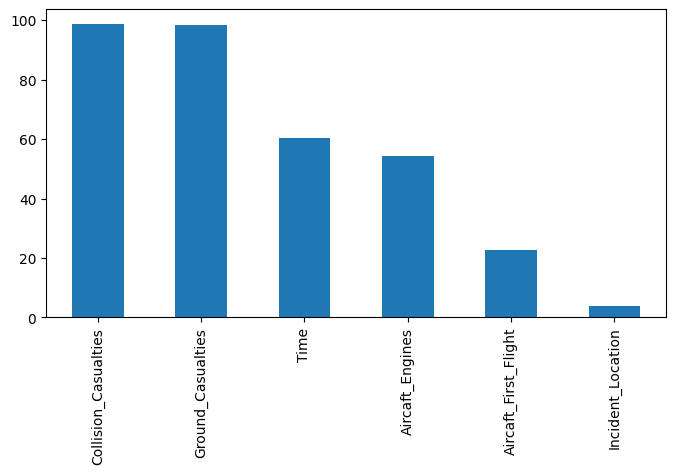

In [10]:
plt.figure(figsize=(8,4))
serie.plot(kind='bar')

In [11]:
pip install missingno

<Axes: >

<Figure size 600x400 with 0 Axes>

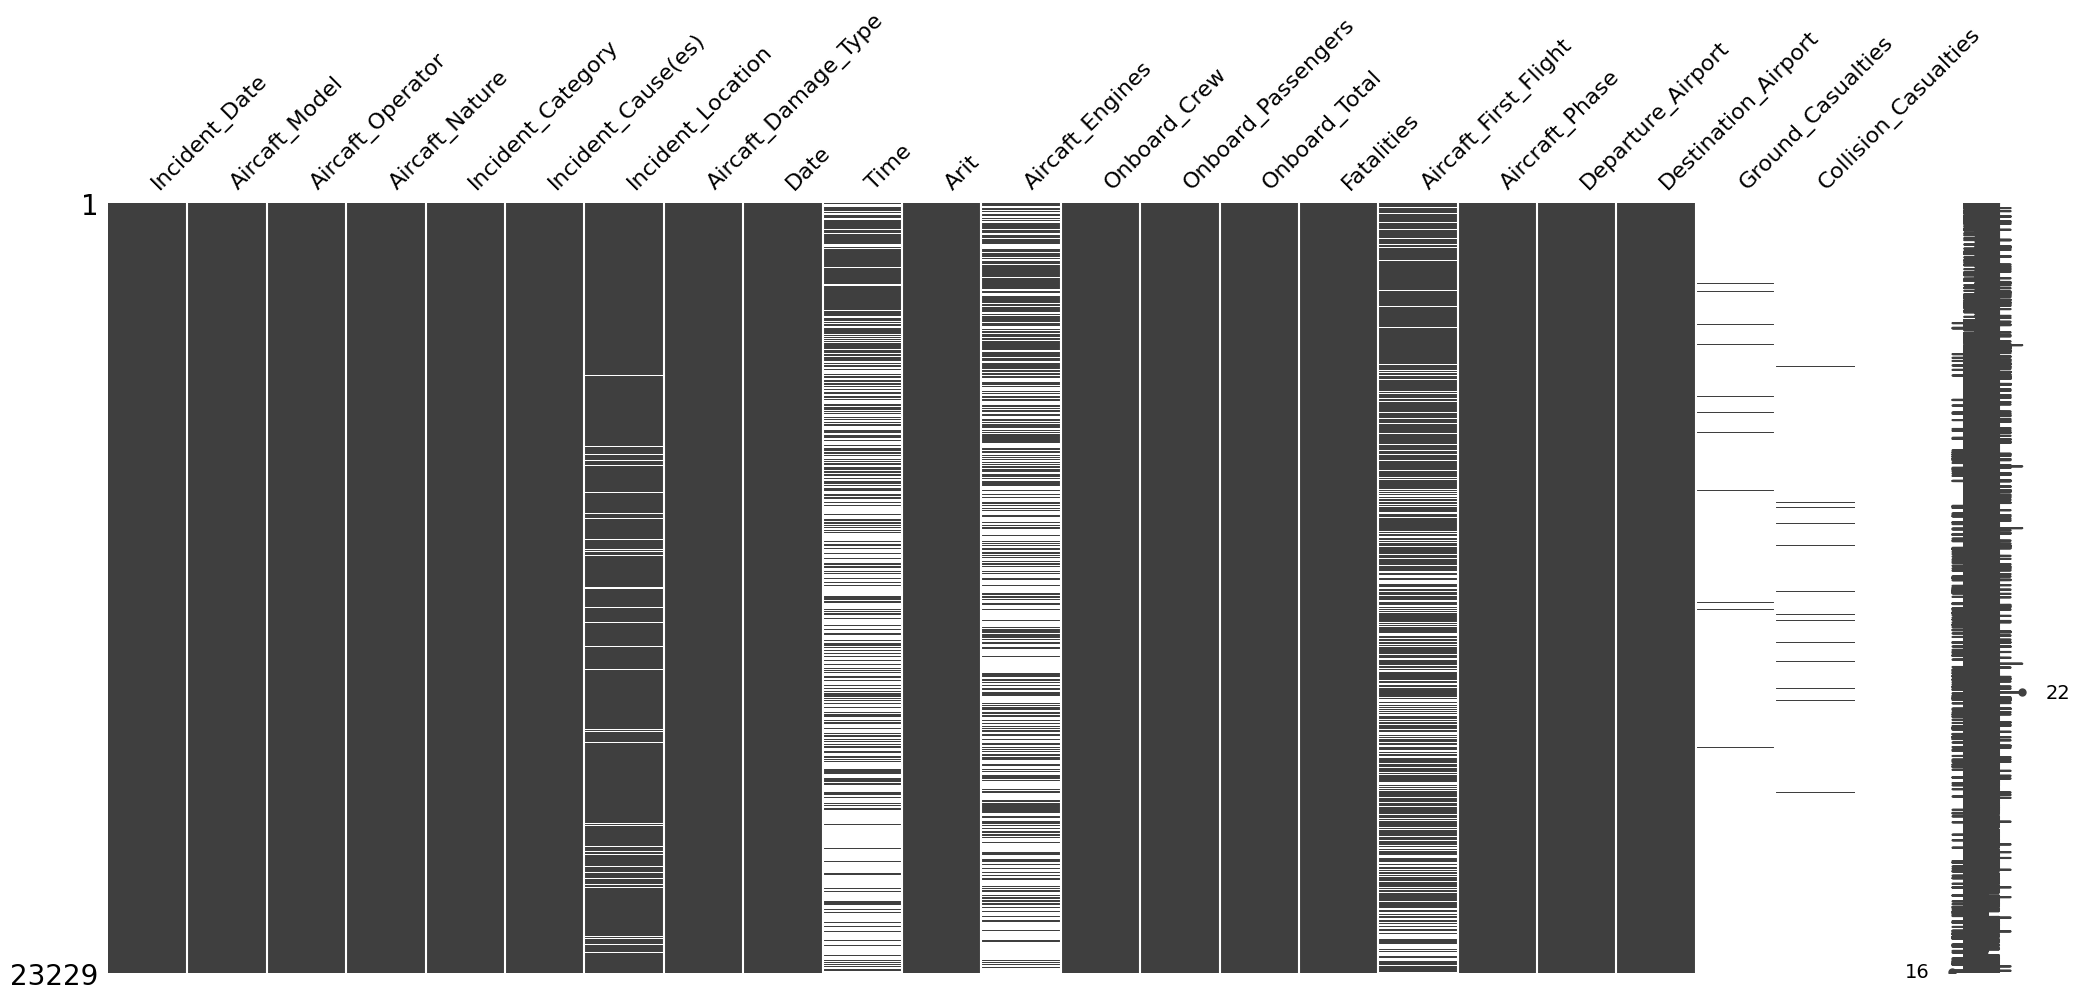

In [12]:
import missingno as msno
plt.figure(figsize=(6, 4))
msno.matrix(df)

<Axes: >

<Figure size 600x400 with 0 Axes>

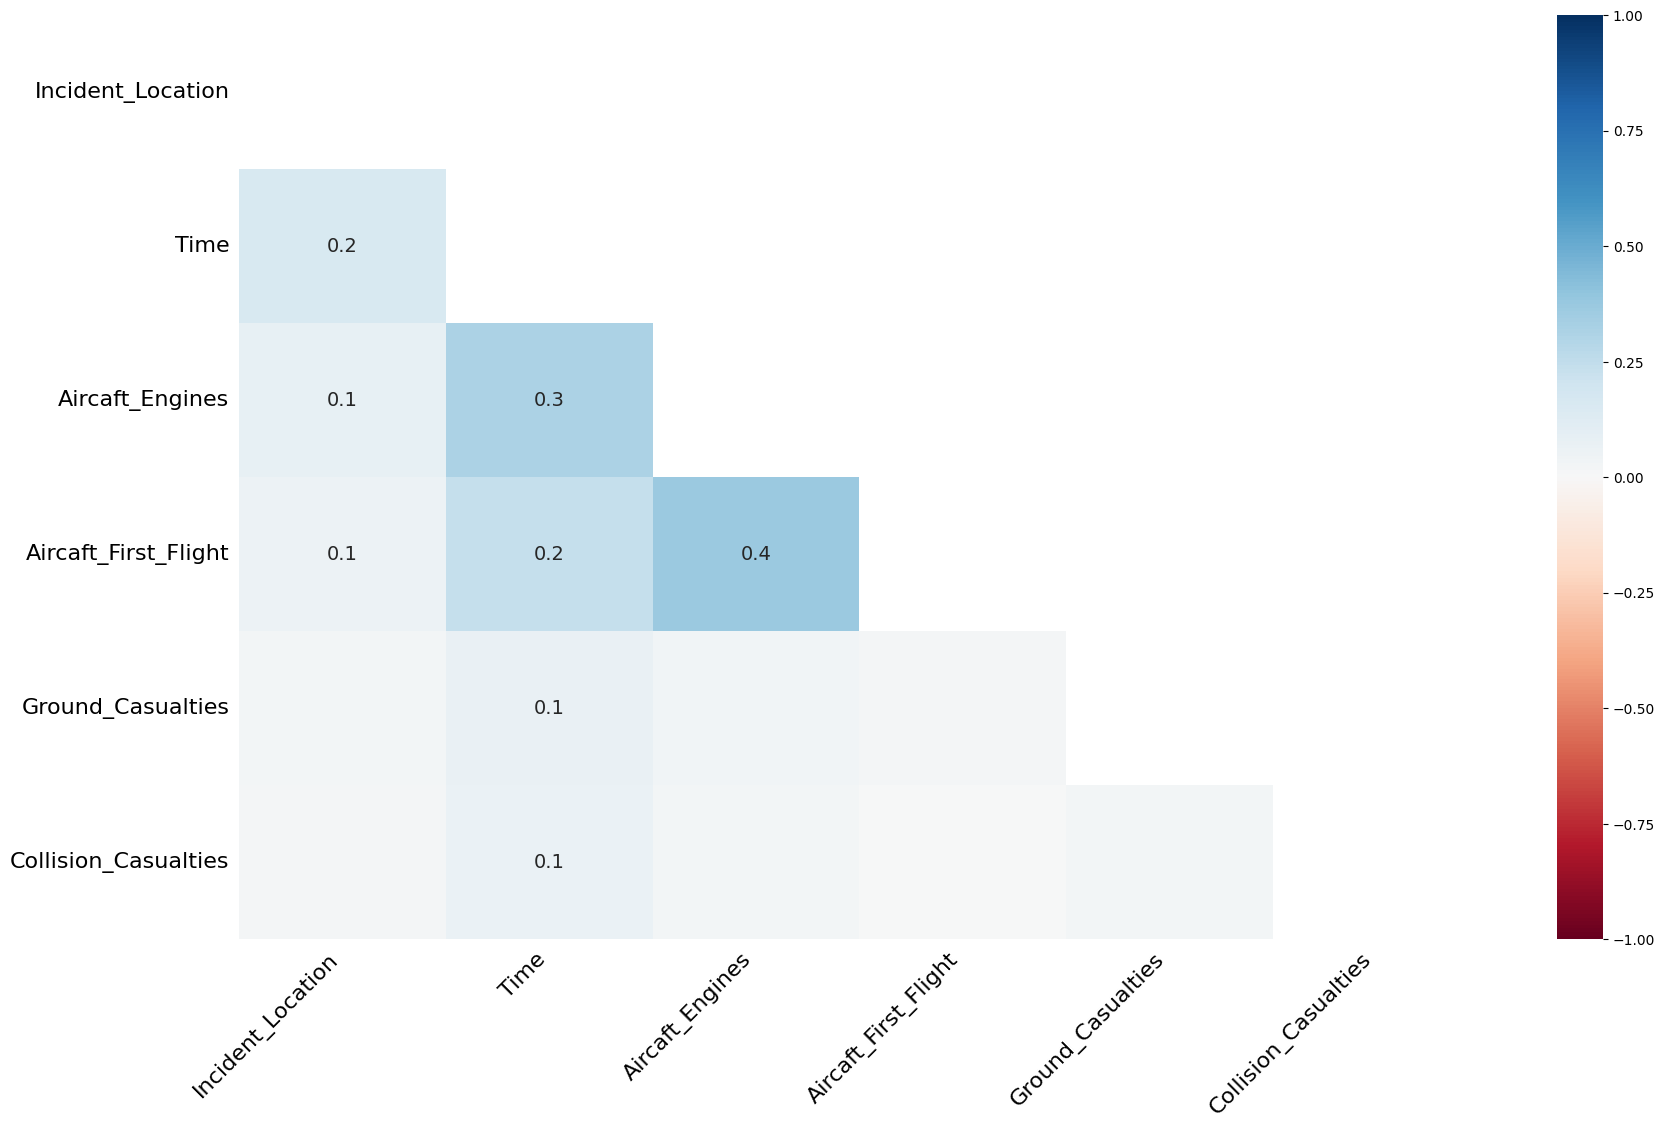

In [13]:
plt.figure(figsize=(6, 4))
msno.heatmap(df)

<Axes: >

<Figure size 600x400 with 0 Axes>

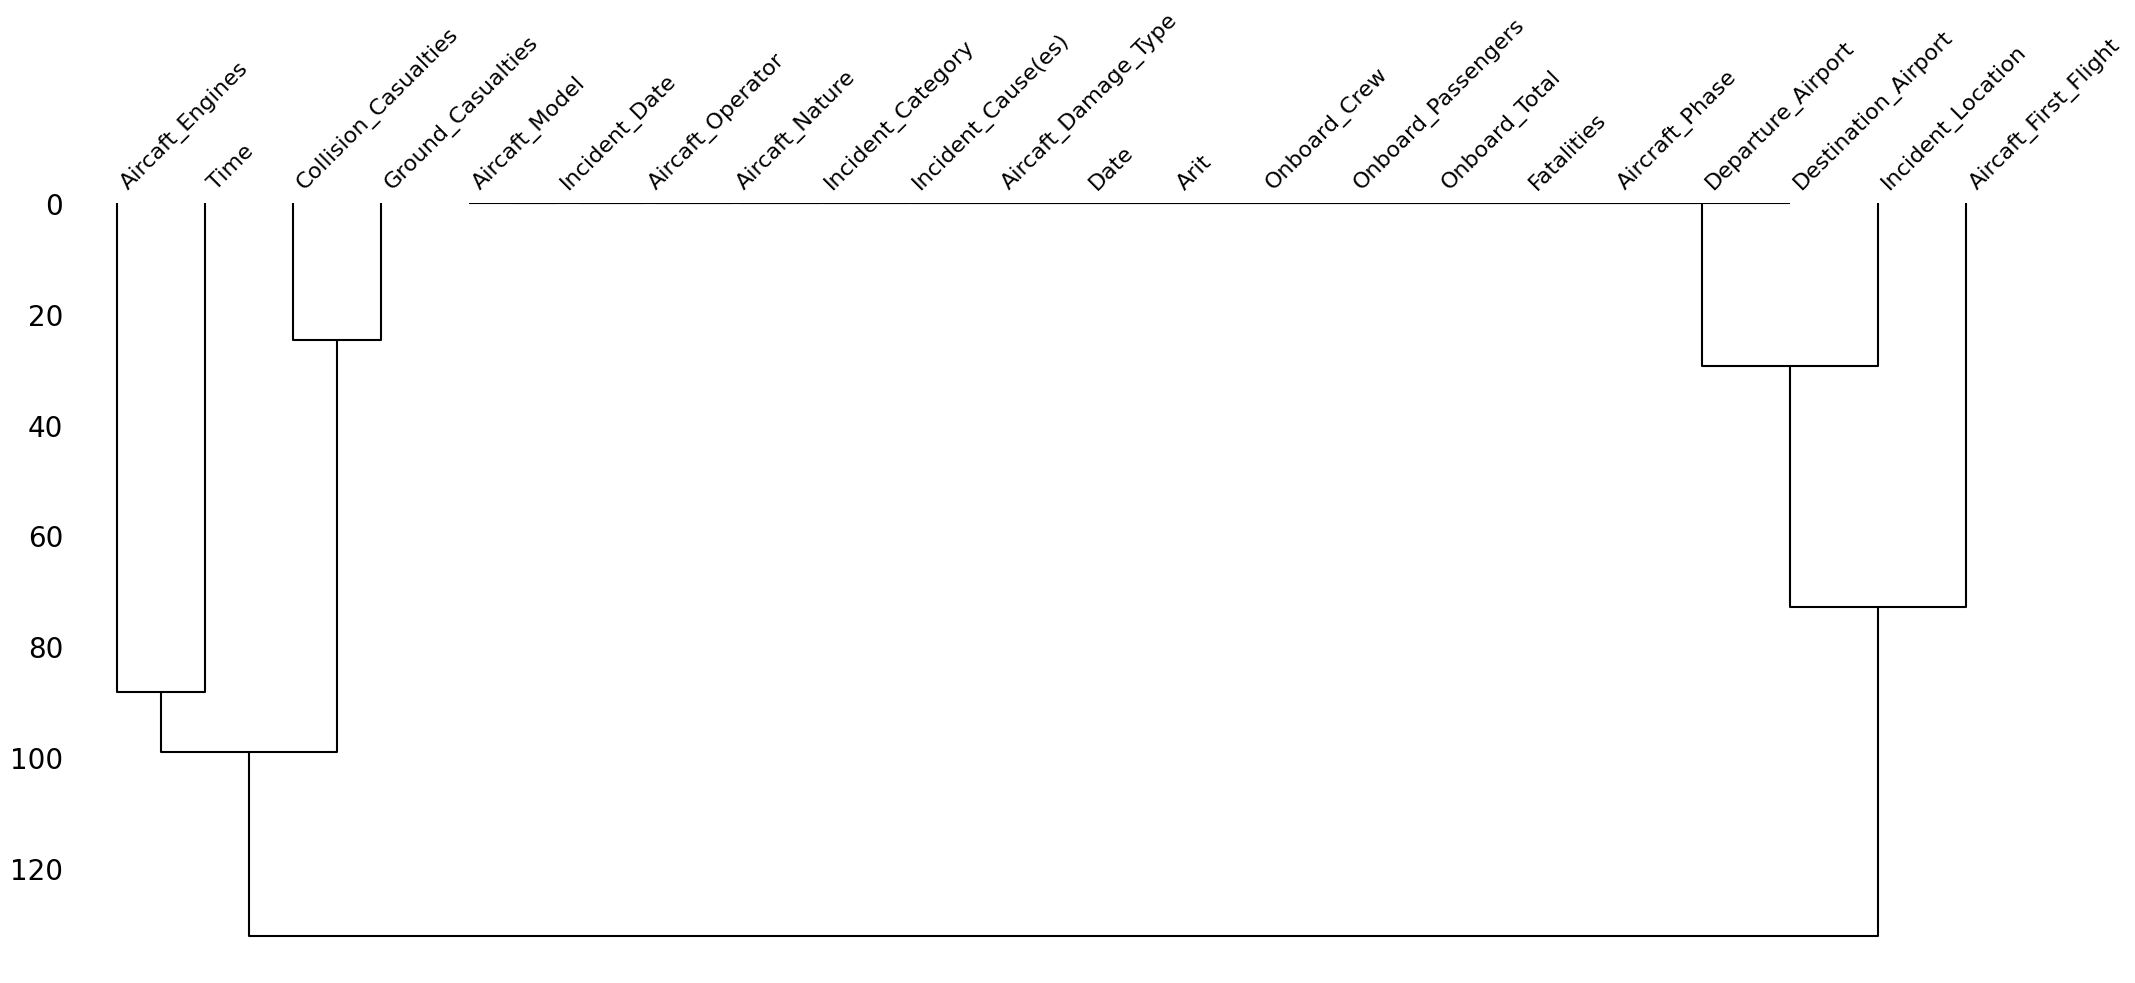

In [14]:
plt.figure(figsize=(6, 4))
msno.dendrogram(df)

Hacemos una resumida visualización de los datos reales que contienen las 3 columnas con mayor porcentaje de nulos.

In [15]:
values_collision_casualties = df['Collision_Casualties'].dropna()
values_ground_casualties = df['Ground_Casualties'].dropna()
values_time = df['Time'].dropna()


print(values_collision_casualties.head(20))
print(values_ground_casualties.head(20))
print(values_time.head(20))

Aircaft_Registration
N1116N        Fatalities: 1
N959PA        Fatalities: 5
N511AC        Fatalities: 2
N752RV        Fatalities: 2
N442RM        Fatalities: 1
OM-SAB        Fatalities: 4
OM-ODQ        Fatalities: 3
RA-76827      Fatalities: 4
1705          Fatalities: 2
N372AC        Fatalities: 3
N600XL      Fatalities: 154
165522        Fatalities: 4
165525        Fatalities: 3
RA-85816      Fatalities: 2
A9C-DHL      Fatalities: 69
IN-302        Fatalities: 6
IN-304        Fatalities: 6
SE-DMA        Fatalities: 4
D-IEVX      Fatalities: 110
F-GHED        Fatalities: 1
Name: Collision_Casualties, dtype: object
Aircaft_Registration
5125        Fatalities: 3
AP-BLD      Fatalities: 1
9M-TST      Fatalities: 1
9N-AMH      Fatalities: 2
766        Fatalities: 14
9S-GNH      Fatalities: 6
OE-GKA      Fatalities: 1
5Y-FDC      Fatalities: 1
TC-MCL     Fatalities: 35
A6-EMW      Fatalities: 1
A-1310     Fatalities: 17
08-3174     Fatalities: 3
TC-CPV      Fatalities: 1
9Q-CVH      Fatali

Podemos prescindir de la columna Time ya que, más allá de la cantidad de nulos, presenta un formato a corregir en gran variedad de caracteres no deseados y además no suele ser un factor relevante en cuanto a accidentes aéreos.
En cuanto a las columnas que contienen más del 98% de nulos, se debe a lo que precisamente especifica el nombre de cada columna:

- **Collision_Casualties** (víctimas por colisión, sin abordaje)
- **Ground_Casualties** (víctimas terrestres, sin abordaje)

Podemos prescindir de ambas columnas ya que, en cuanto a los cálculos que podamos obtener de fatalidades es de mayor relevancia considerar las personas a bordo que las víctimas casuales. No obstante, primero vamos a cruzar algunos datos con las columnas 'Fatalities', 'Onboard_Total', 'Ground_Casualties' y 'Collision_Casualties' para corroborar si hay dependencia de algunos valores en relación a las columnas que queremos borrar.


In [16]:
top_valores = df['Fatalities'].nlargest(10).index
top_onboard_total = df.loc[top_valores, ['Fatalities', 'Onboard_Total', 'Ground_Casualties', 'Collision_Casualties']]
print(top_onboard_total)

                      Fatalities                     Onboard_Total  \
Aircaft_Registration                                                 
N334AA                      1692    Fatalities: 92 / Occupants: 92   
N612UA                       965    Fatalities: 65 / Occupants: 65   
JA8119                       520  Fatalities: 520 / Occupants: 524   
JA8119                         0    Fatalities: 0 / Occupants: 394   
TC-JAV                       346  Fatalities: 346 / Occupants: 346   
N736PA                       335  Fatalities: 335 / Occupants: 396   
N736PA                         0    Fatalities: 0 / Occupants: 379   
VT-EFO                       329  Fatalities: 329 / Occupants: 329   
VT-EFO                         0    Fatalities: 0 / Occupants: 284   
HZ-AIH                       312  Fatalities: 312 / Occupants: 312   
HZ-AHK                       301  Fatalities: 301 / Occupants: 301   
9M-MRD                       298  Fatalities: 298 / Occupants: 298   
EP-IBU              

Hicimos un top de valores más altos de la columna 'Fatalities' para comparar con el resto y efectivamente notamos que suma también las víctimas de ambas columnas 'Casualties'. Trabajaremos en ello, comenzaremos convirtiendo las columnas a int aplicando un código que nos permita dejar sólo los valores númericos.

In [17]:
df['Ground_Casualties'] = df['Ground_Casualties'].fillna('Fatalities: 0').str.replace('Fatalities: ', '').astype(int)
df['Collision_Casualties'] = df['Collision_Casualties'].fillna('Fatalities: 0').str.replace('Fatalities: ', '').astype(int)

df[['Ground_Casualties', 'Collision_Casualties']]

Output hidden; open in https://colab.research.google.com to view.

Dado que la vista del df de ambas columnas arroja todos valores 0, hacemos otras vistas de valores máximos de cada columna para cersiorarnos que hayan otros valores reales y no haya errores.

In [18]:
top_10_ground = df['Ground_Casualties'].sort_values(ascending=False).head(10)
print(top_10_ground)
print('------------------')
top_10_collision = df['Collision_Casualties'].sort_values(ascending=False).head(10)
print(top_10_collision)

Aircaft_Registration
N334AA      1600
N612UA       900
RA-26222     237
N644AA       125
N228SW       107
N730JP        88
OD-ADE        87
YV-C-AVD      71
HC-BKN        49
PK-RIM        49
Name: Ground_Casualties, dtype: int64
------------------
Aircaft_Registration
PH-BUF        335
UN-76435      312
N736PA        248
N600XL        154
G-AWZT        113
D-IEVX        110
CCCP-52018     96
CCCP-65735     94
CCCP-65816     84
N6907C         84
Name: Collision_Casualties, dtype: int64


Modificamos los valores totales de la columna 'Onboard_Total' ya que tiene un formato repetitivo respecto a las 2 columnas anteriores y la posterior.
Nos será de mayor utilidad si sólo mostrara un valor numérico de total de pasajeros y tripulación para luego hacer cálculos precisos con respecto a la columna 'Fatalities', que también es tipo int64.

In [19]:
def procesar_valor(valor):

    partes = valor.split('/ ')
    if len(partes) > 1:
        valor_final = partes[1]
    else:
        valor_final = partes[0]

    numeros = [int(s) for s in valor_final.split() if s.isdigit()]

    if len(numeros) > 0:
        return numeros[-1]
    else:
        return 0

df['Onboard_Total'] = df['Onboard_Total'].apply(procesar_valor)

df['Onboard_Total']

Aircaft_Registration
ZS-NRJ            7
HR-AYY           19
EP-CAP          116
RA-64032          8
NaN               0
N760JB            0
C-GEAS            3
5H-TAZ            0
SP-402           12
RA-33599          2
9S-GFA            2
N821RR            3
PP-BBV            4
N831WP            0
PK-CLC           62
N3RB              1
NaN               4
G-JMCY            2
G-JOTR            5
XB-JMR            2
N275JP            2
N476BJ            0
AF-222            5
N217US            2
NaN               0
NaN               5
JA13KZ            2
9H-FAM            3
RF-95416          0
HB-JOH            0
HZ-FAB            0
N823RC            5
8Q-RAE            9
N559RA            2
C-FFVZ            1
NAF201            7
3912              6
NaN               0
UP-A0351          5
HK-2006           3
B-10GD            5
7T-VUK           34
(HK-4274)        10
EP-CFM            0
N233SW            2
PK-MAD            1
N407GV            4
02 white          6
YV3312            0

Las columnas 'Onboard_Crew' y 'Onboard_Passengers' también presentan formato object los cuales tienen datos específicos de personas a bordo y personas fallecidas en la misma instancia.

In [20]:
df[['Onboard_Crew', 'Onboard_Passengers']]

Output hidden; open in https://colab.research.google.com to view.

Se aplica un código que convierta éstos datos, al igual que los anteriores, para utilizar las columnas en formato int. Para ello, se deja sólo el número de personas a bordo en cada columna extrayendo el número final de cada registro y en caso de no tener número, se asigna 0.

Además se crean 2 columnas nuevas llamadas 'Crew_Fatalities' y 'Pass_Fatalities' las cuales utilizan otro proceso de extracción de número, pero en éste caso el que se asigna luego de 'Fatalities: ' y y en caso de no tener número, se asigna 0.

In [21]:
def extract_fatalities(s):
    numbers = re.findall(r'\d+', s)
    return int(numbers[0]) if numbers else 0

df['Crew_Fatalities'] = df['Onboard_Crew'].apply(lambda x: extract_fatalities(x.split(' / ')[0]))
df['Pass_Fatalities'] = df['Onboard_Passengers'].apply(lambda x: extract_fatalities(x.split(' / ')[0]))
df['Onboard_Crew'] = df['Onboard_Crew'].apply(lambda x: int(re.findall(r'\d+', x.split(' / ')[1])[0]) if re.findall(r'\d+', x.split(' / ')[1]) else 0)
df['Onboard_Passengers'] = df['Onboard_Passengers'].apply(lambda x: int(re.findall(r'\d+', x.split(' / ')[1])[0]) if re.findall(r'\d+', x.split(' / ')[1]) else 0)

df['Onboard_Crew'] = df['Onboard_Crew'].astype(int)
df['Onboard_Passengers'] = df['Onboard_Passengers'].astype(int)
df['Crew_Fatalities'] = df['Crew_Fatalities'].astype(int)
df['Pass_Fatalities'] = df['Pass_Fatalities'].astype(int)

In [22]:
df[['Onboard_Crew', 'Crew_Fatalities', 'Onboard_Passengers', 'Pass_Fatalities']]

Output hidden; open in https://colab.research.google.com to view.

Corroboramos los valores máximos para que no hayan incongruencias.

In [23]:
print(df['Onboard_Crew'].sort_values(ascending=False).head(3))
print('-----------')
print(df['Crew_Fatalities'].sort_values(ascending=False).head(3))
print('-----------')
print(df['Onboard_Passengers'].sort_values(ascending=False).head(3))
print('-----------')
print(df['Pass_Fatalities'].sort_values(ascending=False).head(3))

Aircaft_Registration
83-0008    32
135749     31
141303     29
Name: Onboard_Crew, dtype: int64
-----------
Aircaft_Registration
135749      31
CU-T1201    25
61-0331     24
Name: Crew_Fatalities, dtype: int64
-----------
Aircaft_Registration
JA8119    509
JA8966    503
F-HPJE    497
Name: Onboard_Passengers, dtype: int64
-----------
Aircaft_Registration
JA8119    505
TC-JAV    335
N736PA    326
Name: Pass_Fatalities, dtype: int64


Por último, a la columna 'Fatalities' le omitiremos el valor de las columnas 'Ground_Casualties' y 'Collision_Casualties', sólo sumaremos los fallecidos de las 2 nuevas columnas creadas 'Crew_Fatalities' y 'Pass_Fatalities' para que arroje como resultado únicamente las víctimas que estuvieron a bordo de la aeronave.

In [24]:
df['Fatalities'] = (df['Crew_Fatalities'] + df['Pass_Fatalities'])
df['Fatalities'].sort_values(ascending=False).head(20)

Aircaft_Registration
JA8119     520
TC-JAV     346
N736PA     335
VT-EFO     329
HZ-AIH     312
HZ-AHK     301
9M-MRD     298
EP-IBU     290
15-2280    275
N110AA     271
HL7442     269
B-1816     264
C-GMXQ     261
N14053     260
N739PA     259
7T-WIV     257
ZK-NZP     257
N950JW     256
PH-BUF     248
9M-MRO     239
Name: Fatalities, dtype: int64

Una vez modificado y agregado las columnas según la utilidad deseada, revisamos los valores antes de finalmente decidir borrar las columnas com mayor porcentaje de valores nulos.

In [25]:
df.Collision_Casualties.value_counts().head(25)

0     22942
1        60
2        55
4        29
5        20
3        20
7        18
6        14
9         5
8         5
11        4
10        4
17        3
15        3
13        3
12        3
24        3
18        2
84        2
20        2
26        2
14        2
70        1
35        1
96        1
Name: Collision_Casualties, dtype: int64

In [26]:
df.Ground_Casualties.value_counts().head(25)

0     22882
1       133
2        57
3        35
4        21
6        16
7        13
5        11
8         7
10        5
9         4
13        3
24        3
12        3
22        3
49        2
25        2
32        2
17        2
14        2
44        2
11        2
23        2
71        1
19        1
Name: Ground_Casualties, dtype: int64

In [27]:
df.Time.value_counts().head(25)

14:30       46
10:30       40
16:30       37
17:30       35
18:30       35
11:30       35
08:30       35
12:30       34
ca 10:00    34
15:30       34
ca 11:00    33
19:30       33
11:00       33
21:30       33
ca 12:00    32
08:00       31
20:30       31
15:00       31
ca 13:00    31
ca 14:00    30
13:30       29
16:00       29
10:15       28
ca 15:00    27
09:30       27
Name: Time, dtype: int64

In [28]:
df.Aircaft_Engines.value_counts().head(25)

2 Pratt Whitney R-1830-92           1579
2 Pratt Whitney R-1830-90C           582
2 Pratt Whitney R-2800-51            544
2 Pratt Whitney Canada PT6A-27       288
1 Pratt Whitney Canada PT6A-114A     257
4 Ivchenko AI-20M                    124
4 Pratt Whitney JT3D-3B              119
3 Ivchenko AI-25                     116
2 Pratt Whitney Canada PT6A-20       105
4 Rolls-Royce Merlin                  95
2 Ivchenko AI-24VT                    95
1 Pratt Whitney Canada PT6A-114       92
2 Garrett TFE731-2-2B                 87
1 Shvetsov ASh-62IR                   85
2 Lycoming O-540-E4C5                 83
2 Pratt Whitney R-1830-90             73
2 Pratt Whitney JT8D-9A               72
2 Pratt Whitney R-1830                72
2 CFMI CFM56-3C1                      72
3 Pratt Whitney R-1340 Wasp           70
4 Pratt Whitney R-2800                68
2 Pratt Whitney Canada PT6A-34        65
2 Bristol Hercules 230                64
4 Pratt Whitney R-4360-20WA           61
2 Pratt Whitney 

Borramos las columnas y verificamos las que quedaron.

In [29]:
delete_columns=['Collision_Casualties','Ground_Casualties','Time']

df = df.drop(labels=delete_columns, axis=1)
df.columns.tolist()

['Incident_Date',
 'Aircaft_Model',
 'Aircaft_Operator',
 'Aircaft_Nature',
 'Incident_Category',
 'Incident_Cause(es)',
 'Incident_Location',
 'Aircaft_Damage_Type',
 'Date',
 'Arit',
 'Aircaft_Engines',
 'Onboard_Crew',
 'Onboard_Passengers',
 'Onboard_Total',
 'Fatalities',
 'Aircaft_First_Flight',
 'Aircraft_Phase',
 'Departure_Airport',
 'Destination_Airport',
 'Crew_Fatalities',
 'Pass_Fatalities']

Para la columna 'Aircaft_Model' vamos a hacer un tratado especial ya que sus variables categóricas pueden llegar a servir en caso de que tengan correlación directa con el tipo de aeronave descrito en la columna 'Aircaft_Model'.

Para ello, lo corroboramos viendo sus valores y dicha posible correlación.

In [30]:
df['Aircaft_Model'].value_counts().head(20)

Douglas C-47-DL (DC-3)                      457
Antonov An-2R                               378
Junkers Ju-52/3m                            357
Douglas Dakota III (DC-3)                   256
de Havilland Canada DHC-6 Twin Otter 300    253
Cessna 208B Grand Caravan                   231
Consolidated PBY-5A Catalina                214
Douglas C-47 (DC-3)                         203
Douglas C-47A-90-DL (DC-3)                  202
Douglas Dakota IV (DC-3)                    199
Douglas C-47A-25-DK (DC-3)                  199
Antonov An-2                                178
Douglas C-47A-80-DL (DC-3)                  173
Lisunov Li-2                                158
Beechcraft 200 Super King Air               152
Consolidated PBY-5 Catalina                 150
Antonov An-26                               128
Douglas DC-3                                124
Boeing 727                                  121
Douglas C-47A-20-DK (DC-3)                  119
Name: Aircaft_Model, dtype: int64

In [31]:
df_sorted = df.sort_values(by='Aircaft_Model')

df_sorted[['Aircaft_Model', 'Aircaft_Engines']].head(100)

,Aircaft_Model,Aircaft_Engines
Aircaft_Registration,,
N51CS,ATECO Westwind II,2 Pratt Whitney Canada PT6A-27
F-WEGA,ATR 42-200,NaN
C-GIQV,ATR 42-300,2 Pratt Whitney Canada PW120
I-ATRF,ATR 42-300,2 Pratt Whitney Canada PW120
N254AT,ATR 42-300,NaN
NaN,ATR 42-300,NaN
PK-YRN,ATR 42-300,2 Pratt Whitney Canada PW120
PK-YRP,ATR 42-300,2 Pratt Whitney Canada PW121
PT-MFK,ATR 42-300,2 Pratt Whitney Canada PW120


Notamos que ésta correlación existe y nos será de gran ayuda ya que la usaremos para llenar los valores nulos con los valores existentes dentro de la misma columna y en relación con las variables a las que pertenece según la columna 'Aircaft_Model'.

In [32]:
df['Aircaft_Engines'] = df.groupby('Aircaft_Model')['Aircaft_Engines'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))
df['Aircaft_Engines'].isnull().sum()

0

En cuanto a la columna 'Aircaft_First_Flight', no es un dato que sea relevante al momento de analizar y/o predecir, pero de la misma podemos hacer un cálculo que nos permita calcular la edad de la aeronave y ése si puede ser un dato que sea de gran aporte al proyecto.

Se identifican diversidad de formatos de valores, donde a veces posee solo 4 dígitos que indican un año, en otros casos poseen una fecha completa y también pueden tener una referencia de edad por meses y/o años de antigüedad entre parentesis.

In [33]:
df['Aircaft_First_Flight'].head(20)

Aircaft_Registration
ZS-NRJ      1995-05-19  (26 years 8 months)
HR-AYY                                 1985
EP-CAP      1992-09-18  (29 years 4 months)
RA-64032    2002-07-18  (19 years 6 months)
NaN                                     NaN
N760JB      2008-10-07  (13 years 4 months)
C-GEAS                                 1990
5H-TAZ                                 2006
SP-402                                  NaN
RA-33599                               1988
9S-GFA                                 1987
N821RR                                 1973
PP-BBV                                 1995
N831WP                                 1979
PK-CLC      1994-05-13  (26 years 8 months)
N3RB                                   1989
NaN                                     NaN
G-JMCY      1994-10-20  (26 years 3 months)
G-JOTR      1996-09-19  (24 years 4 months)
XB-JMR                                 1969
Name: Aircaft_First_Flight, dtype: object

Ingresamos un código de cálculo que nos permita extraer sólo los primeros 4 dígitos que indiquen el año del primer vuelo y luego restar dicho valor - el número de año existente en la columna 'Incident_Date' para devolver la edad de la aeronave al momento del suceso, en una columna nueva llamada 'Aircraft_Age'. Se agregará un condicional que devuelva valor 0 en caso de que la columna 'Aircaft_First_Flight' no posea valores o sea NaN, para que en ésos casos entonces no realice la resta, sino que devuelva valor 0 en la columna nueva (de ésta manear evitamos posibles errores en los cuales, por ejemplo, veamos aeronaves con edad 1962).

Primero vamos a modificar la columna 'Incident_Date' para transformarla a formato datetime, comenzamos por visualizar los datos.

In [34]:
print(df['Incident_Date'].head(20))
print('---------------------')
print(df['Incident_Date'].tail(20))

Aircaft_Registration
ZS-NRJ      03-JAN-2022
HR-AYY      04-JAN-2022
EP-CAP      05-JAN-2022
RA-64032    08-JAN-2022
NaN         12-JAN-2022
N760JB      22-JAN-2022
C-GEAS      31-JAN-2022
5H-TAZ      05-FEB-2022
SP-402      08-FEB-2022
RA-33599    11-FEB-2022
9S-GFA      14-FEB-2022
N821RR      15-FEB-2022
PP-BBV      02-JAN-2021
N831WP      02-JAN-2021
PK-CLC      09-JAN-2021
N3RB        09-JAN-2021
NaN         12-JAN-2021
G-JMCY      19-JAN-2021
G-JOTR      19-JAN-2021
XB-JMR      23-JAN-2021
Name: Incident_Date, dtype: object
---------------------
Aircaft_Registration
F-AEEE    15-JUL-1923
F-AECB    27-AUG-1923
F-AEIF    03-DEC-1923
NaN       ??-???-1923
G-EATN    22-JAN-1922
NaN       31-MAR-1922
F-GEAD    07-APR-1922
NaN       15-JAN-1921
G-IAAC    02-MAR-1921
NaN       04-MAR-1921
O-BLAN    26-AUG-1921
O-BRUN    27-SEP-1921
O-BLEU    27-SEP-1921
G-EATM    30-DEC-1921
G-EANV    23-FEB-1920
G-EAMC    25-FEB-1920
G-EAKE    30-JUN-1920
G-EAMA    14-DEC-1920
NaN       02-AUG-1919
N12

Encontramos que hay algunos registros que tienen caracteres erróneos, específicamente "??". Dichos caracteres son omitidos a fin de filtrar las filas que cumplan el formato adecuado y luego se utiliza la función pd.to_datetime para convertir la columna "Incident_Date" en formato fecha.

In [35]:
df = df[df['Incident_Date'].str.match(r'\d{2}-[A-Z]{3}-\d{4}', na=False)]

A continuación cambiamos el formato de la columna 'Incident-Date' a datetime y ejecutamos las visualizaciones para confirmar el formato asignado.

In [36]:
df['Incident_Date'] = pd.to_datetime(df['Incident_Date'], format='%d-%b-%Y')
df['Incident_Date']

Aircaft_Registration
ZS-NRJ         2022-01-03
HR-AYY         2022-01-04
EP-CAP         2022-01-05
RA-64032       2022-01-08
NaN            2022-01-12
N760JB         2022-01-22
C-GEAS         2022-01-31
5H-TAZ         2022-02-05
SP-402         2022-02-08
RA-33599       2022-02-11
9S-GFA         2022-02-14
N821RR         2022-02-15
PP-BBV         2021-01-02
N831WP         2021-01-02
PK-CLC         2021-01-09
N3RB           2021-01-09
NaN            2021-01-12
G-JMCY         2021-01-19
G-JOTR         2021-01-19
XB-JMR         2021-01-23
N275JP         2021-01-23
N476BJ         2021-01-24
AF-222         2021-01-26
N217US         2021-01-28
NaN            2021-01-29
JA13KZ         2021-02-01
9H-FAM         2021-02-08
RF-95416       2021-02-09
HB-JOH         2021-02-09
HZ-FAB         2021-02-10
N823RC         2021-02-13
8Q-RAE         2021-02-14
N559RA         2021-02-18
C-FFVZ         2021-02-20
NAF201         2021-02-21
3912           2021-02-21
NaN            2021-02-21
UP-A0351       20

A modo de organización, creamos 2 columnas que especifican año y mes de la columna 'Incident_Date':
- Sobre la columna 'Year', extraemos sólo el año de la columna 'Incident_Date'.
- Sobre la columna 'Month', asignamos y mostramos la abreviación textual de cada uno.

In [37]:
df['Year'] = df['Incident_Date'].dt.year
df['Month'] = df['Incident_Date'].dt.month

meses = {
    1: 'Ene',
    2: 'Feb',
    3: 'Mar',
    4: 'Abr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dic'}

df['Month'] = df['Month'].map(meses)

df[['Month', 'Year']]

Output hidden; open in https://colab.research.google.com to view.

Visualización de los años y meses donde se registraron los casos.

In [38]:
print(df['Year'].unique())
print("---------")
print(df['Month'].unique())

[2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009
 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995
 1994 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981
 1980 1979 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969 1968 1967
 1966 1965 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955 1954 1953
 1952 1951 1950 1949 1948 1947 1946 1945 1944 1943 1942 1941 1940 1939
 1938 1937 1936 1935 1934 1933 1932 1931 1930 1929 1928 1927 1926 1925
 1924 1923 1922 1921 1920 1919]
---------
['Ene' 'Feb' 'Mar' 'Abr' 'May' 'Jun' 'Jul' 'Ago' 'Sep' 'Oct' 'Nov' 'Dic']


Ahora si procedemos a crear la columna 'Aircraft_Age' previamente mencionada.

In [42]:
def calcular_edad(row):
    first_flight_year = str(row['Aircaft_First_Flight'])[:4]
    if first_flight_year.isdigit() and int(first_flight_year) != 0:
        return row['Year'] - int(first_flight_year)
    else:
        return 0

df['Aircraft_Age'] = df.apply(calcular_edad, axis=1).astype(int)

df['Aircraft_Age'].value_counts()

 0     6622
 1     2152
 2     1093
 3      739
 5      686
 4      658
 6      602
 7      587
 8      496
 9      456
 11     453
 10     431
 12     402
 13     400
 15     391
 16     390
 14     387
 18     334
 19     329
 21     328
 17     328
 20     314
 22     311
 23     295
 24     256
 25     250
 27     244
 26     243
 28     207
 29     186
 31     185
 32     180
 30     164
 34     161
 33     150
 35     142
 36     133
 37     118
 38      99
 39      97
 40      75
 41      73
 42      63
 44      59
 43      50
 46      45
 45      37
 47      36
 48      32
 51      30
 49      29
 50      29
 54      18
 55      16
 53      15
 52      14
 62      14
 58      13
 60      11
 56      10
 59       9
 57       8
 65       7
 64       6
 75       6
 61       6
 63       5
 66       5
 68       4
 67       3
 73       3
 71       3
 70       2
 77       2
 76       2
 74       2
 72       1
 69       1
 79       1
-4        1
Name: Aircraft_Age, dtype: int64

In [44]:
print(df['Aircraft_Age'].nlargest(20))
print('-----------------')
print(df['Aircraft_Age'].nsmallest(20))


Aircaft_Registration
HB-HOT      79
HK-2820     77
C-GJKM      77
C-FKGL      76
C-FKAL      76
HK-2006     75
N467KS      75
N93012      75
N437GB      75
FAS116      75
HK-3293     75
HK-2494     74
C-FKGL      74
N1822M      73
N47HL       73
C-GEAJ      73
HK-2663     72
FAC-1658    71
C-GTXW      71
HK-4700     71
Name: Aircraft_Age, dtype: int64
-----------------
Aircaft_Registration
ZS-SBE     -4
NaN         0
SP-402      0
NaN         0
AF-222      0
NaN         0
NaN         0
UP-A0351    0
02 white    0
NaN         0
RA-40...    0
XB-R..      0
N388WA      0
RF-94603    0
NaN         0
NaN         0
PK-RVH      0
TR-NGT      0
NaN         0
N42FL       0
Name: Aircraft_Age, dtype: int64


Notamos que por algún error de registro del dataset hay un valor negativo y además quedaron muchos valores en 0 dada la cantidad de nulos en la columna 'Aircaft_First_Flight' por lo cual procedemos a llenar ésos valores 0 y negativos con la media.

In [46]:
mean_age = df[df['Aircraft_Age'] > 0]['Aircraft_Age'].mean()

df['Aircraft_Age'] = df['Aircraft_Age'].apply(lambda x: int(mean_age) if x <= 0 else x)
df['Aircraft_Age'] = df['Aircraft_Age'].astype(int)

print(df['Aircraft_Age'].nlargest(20))
print('-----------------')
print(df['Aircraft_Age'].nsmallest(20))

Aircaft_Registration
HB-HOT      79
HK-2820     77
C-GJKM      77
C-FKGL      76
C-FKAL      76
HK-2006     75
N467KS      75
N93012      75
N437GB      75
FAS116      75
HK-3293     75
HK-2494     74
C-FKGL      74
N1822M      73
N47HL       73
C-GEAJ      73
HK-2663     72
FAC-1658    71
C-GTXW      71
HK-4700     71
Name: Aircraft_Age, dtype: int64
-----------------
Aircaft_Registration
VT-MPQ      1
RF-88450    1
N1GG        1
ET-AYB      1
VP-BWC      1
ET-AVJ      1
G-CKWB      1
5H-AAM      1
HL7204      1
XA-UYY      1
N204HA      1
B-16852     1
PR-TLZ      1
ET-AUP      1
5820        1
N315DN      1
N991AU      1
C-GYJZ      1
9N-AHH      1
B-10FW      1
Name: Aircraft_Age, dtype: int64


Por último, la columna 'Incident_Location' tiene formato object, con más de 13.000 variables categóricas que no serán de utilidad ya que son datos inexactos e incompletos y terminan siempre con puntos suspensivos.

In [52]:
print(df['Incident_Location'].head(25))
print('------------------')
print('Cantidad de valores únicos: ', df['Incident_Location'].nunique())

Aircaft_Registration
ZS-NRJ      near Venetia Mine...
HR-AYY           Roatán-Juan ...
EP-CAP           Isfahan-Shah...
RA-64032         Hangzhou-Xia...
NaN              Machakilha, ...
N760JB           Hayden-Yampa...
C-GEAS           Thunder Bay ...
5H-TAZ           New Fangak A...
SP-402             Agok Airstrip
RA-33599    near Koryaki, Yel...
9S-GFA           Bukavu-Kavum...
N821RR           Culebra Airp...
PP-BBV           Diamantina A...
N831WP           White Plains...
PK-CLC      near Jakarta-Soek...
N3RB         near Pine Grove, OR
NaN                     near Voi
G-JMCY           Exeter Airpo...
G-JOTR           London-Biggi...
XB-JMR           Rocky Point,...
N275JP           Los Mochis-F...
N476BJ           Binghamton A...
AF-222           Mukinge Miss...
N217US           Davenport Ai...
NaN              Crooked Tree...
Name: Incident_Location, dtype: object
------------------
Cantidad de valores únicos:  13880


Ésta columna también será eliminada junto con 'Aircaft_First_Flight' de la cual ya extrajimos lo necesario para la columna 'Aircraft_Age'.

In [56]:
delete_columns2 = ['Aircaft_First_Flight','Incident_Location']
df = df.drop(labels=delete_columns2, axis=1)

### Comprobación final

Ahora si verificamos cómo queda nuestro dataset, sin valores nulos y con los formatos optimizados para posteriores análisis.

In [60]:
df.dtypes

Incident_Date          datetime64[ns]
Aircaft_Model                  object
Aircaft_Operator               object
Aircaft_Nature                 object
Incident_Category              object
Incident_Cause(es)             object
Aircaft_Damage_Type            object
Date                           object
Arit                           object
Aircaft_Engines                object
Onboard_Crew                    int64
Onboard_Passengers              int64
Onboard_Total                   int64
Fatalities                      int64
Aircraft_Phase                 object
Departure_Airport              object
Destination_Airport            object
Crew_Fatalities                 int64
Pass_Fatalities                 int64
Year                            int64
Month                          object
Aircraft_Age                    int64
dtype: object

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22745 entries, ZS-NRJ to N123
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Incident_Date        22745 non-null  datetime64[ns]
 1   Aircaft_Model        22745 non-null  object        
 2   Aircaft_Operator     22745 non-null  object        
 3   Aircaft_Nature       22745 non-null  object        
 4   Incident_Category    22745 non-null  object        
 5   Incident_Cause(es)   22745 non-null  object        
 6   Aircaft_Damage_Type  22745 non-null  object        
 7   Date                 22745 non-null  object        
 8   Arit                 22745 non-null  object        
 9   Aircaft_Engines      22745 non-null  object        
 10  Onboard_Crew         22745 non-null  int64         
 11  Onboard_Passengers   22745 non-null  int64         
 12  Onboard_Total        22745 non-null  int64         
 13  Fatalities           22745 non-n

In [62]:
df.isnull().sum()

Incident_Date          0
Aircaft_Model          0
Aircaft_Operator       0
Aircaft_Nature         0
Incident_Category      0
Incident_Cause(es)     0
Aircaft_Damage_Type    0
Date                   0
Arit                   0
Aircaft_Engines        0
Onboard_Crew           0
Onboard_Passengers     0
Onboard_Total          0
Fatalities             0
Aircraft_Phase         0
Departure_Airport      0
Destination_Airport    0
Crew_Fatalities        0
Pass_Fatalities        0
Year                   0
Month                  0
Aircraft_Age           0
dtype: int64